## The Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City.

<img src="Ti.jpeg" style="height:500px">

<h1><center>overview of the CaseStudy</h1></center>
**The task is to predict the survival on the Titanic based on the dataset of the onboard passengers of the historical journey embarked on April 15, 1912. The features include Gender, Age, Passenger class, Port of Embarkation,etc. It requires a binary classification of 1/0, 1 meaning Survived and 0 meaning not survived.**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  

In [2]:
df=pd.read_csv("C:\\Users\\Akash\\Desktop\\titanic_project\\Day3-TitanicProject[06.12.19]\\titanic_project\\titanic_original.csv")
print(df.shape)

(1309, 11)


In [3]:
df.head(5)

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Pclass      1309 non-null int64
Survived    1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [6]:
df.describe(include="all")

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [6]:
print('Nas in Age :',df.Age.isna().sum())
print('Nas in Fare :',df.Fare.isna().sum())
#print('Nas in cabin :',df.Cabin.isna().sum())
print('Nas in Embarked :',df.Embarked.isna().sum())

Nas in Age : 263
Nas in Fare : 1
Nas in Embarked : 2


In [7]:
df.Age=df.Age.fillna(df.Age.mean())
df.Fare=df.Fare.fillna(df.Fare.mode()[0])
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])

In [8]:
print('Nas in age :',df.Age.isna().sum())
print('Nas in fare :',df.Fare.isna().sum())
print('Nas in embarked :',df.Embarked.isna().sum())

Nas in age : 0
Nas in fare : 0
Nas in embarked : 0


In [9]:
df1 = df.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]

In [10]:
df1.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,0,1,female,2.0000,1,2,S
3,0,1,male,30.0000,1,2,S
4,0,1,female,25.0000,1,2,S


In [11]:
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
df1['economic_status']=df1.Pclass.map({1:'Upper',2:'Middle',3:'Lower'})

In [12]:
#(C = Cherbourg; Q = Queenstown; S = Southampton)
df1['embarkedport']=df1.Embarked.map({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

In [13]:
df1.drop(['Pclass','Embarked'],axis=1,inplace=True)

In [14]:
agesplit = [0,10,19,26,60,85]
agestatus = ['Kid','Teenager','Young Adult','Adult','Sr.Citizen']

In [15]:
df1['Age_group']=pd.cut(df1.Age,agesplit,labels=agestatus)

In [16]:
# Create a feature where we count both numbers of siblings and parents
df1['familymembers']=df1.SibSp+df.Parch

In [17]:
# Let us try to find whether the passengers are alone or not
hasfamily = (df1.familymembers>0)*1
df1['hasfamily'] = hasfamily

In [18]:
Has=0
HasNot=0
for i in df1['hasfamily']:
    if i==1:
        Has+=1
    else:
        HasNot+=1
print("Passenger Having Family Member",Has)
print("Passenger That are alone",HasNot)

Passenger Having Family Member 519
Passenger That are alone 790


In [19]:
df_HasFamily_servive=df1[(df1['Survived']==1) & (df1['hasfamily']==1)]
count=0
df_HasFamily_servive['Survived'].count()

261

In [20]:
df_HasFamily_servive=df1[(df1['Survived']==1) & (df1['hasfamily']==0)]
count=0
df_HasFamily_servive['Survived'].count()

239

In [21]:
df1.drop(['SibSp','Parch','Age'],axis=1,inplace=True)

In [22]:
df1.head()

,Survived,Sex,economic_status,embarkedport,Age_group,familymembers,hasfamily
0,1,female,Upper,Southampton,Adult,0,0
1,1,male,Upper,Southampton,Kid,3,1
2,0,female,Upper,Southampton,Kid,3,1
3,0,male,Upper,Southampton,Adult,3,1
4,0,female,Upper,Southampton,Young Adult,3,1


## Count Based on Gender

In [23]:
df_Gender_count = df1.Sex
Gender_count = df_Gender_count.groupby(df_Gender_count).count()
print(Gender_count)

Sex
female    466
male      843
Name: Sex, dtype: int64


Text(0,0.5,'Count')

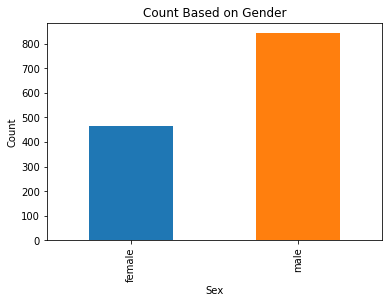

In [24]:
Gender_count.plot(kind='bar')
plt.title("Count Based on Gender")
plt.ylabel("Count")


## Survived

In [25]:
df_Survived = df1.Survived
overall_Survived = df_Survived.groupby(df_Survived).count()
print(overall_Survived)

Survived
0    809
1    500
Name: Survived, dtype: int64


Legend:
 0 = Did not survive 
 1 = Survived


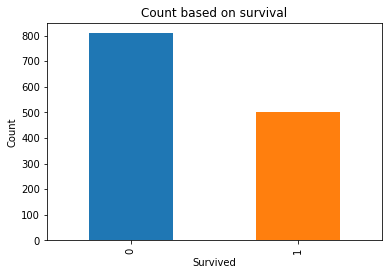

In [26]:
overall_Survived.plot(kind='bar')
plt.title("Count based on survival")
plt.ylabel("Count")
print("Legend:\n 0 = Did not survive \n 1 = Survived")

In [27]:
notsurvivors = df1[df1.Survived==0].Sex.value_counts()
survivors= df1[df1.Survived==1].Sex.value_counts()

print("******Not Survived******","\n",notsurvivors)
print("******Survived******","\n",survivors)

******Not Survived****** 
 male      682
female    127
Name: Sex, dtype: int64
******Survived****** 
 female    339
male      161
Name: Sex, dtype: int64


Text(0,0.5,'Count')

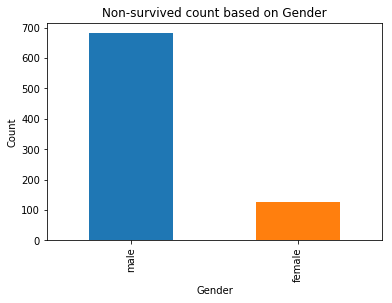

In [28]:
notsurvivors.plot(kind='bar')
plt.title("Non-survived count based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0,0.5,'Count')

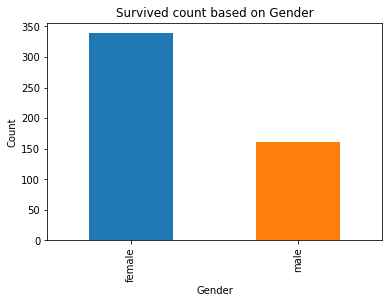

In [29]:
survivors.plot(kind='bar')
plt.title("Survived count based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

In [30]:
notsurvivors = df1[df1.Survived==0].Sex.value_counts()
survivors= df1[df1.Survived==1].Sex.value_counts()


******Not Survived****** 
 male      682
female    127
Name: Sex, dtype: int64
******Survived****** 
 female    339
male      161
Name: Sex, dtype: int64


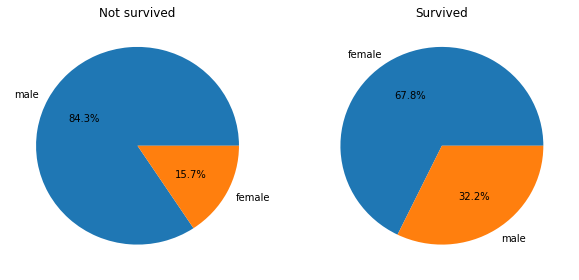

In [31]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)

ax2 = fig.add_subplot(222)
# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index,autopct='%1.1f%%');
ax1.title.set_text('Not survived')
ax2.pie(survivors,labels=survivors.index,autopct='%1.1f%%');
ax2.title.set_text('Survived')


print("******Not Survived******","\n",notsurvivors)
print("******Survived******","\n",survivors)

In [32]:
#survived males
Survived_Male = df1[(df1.Survived == 1) & (df.Sex == 'male')] 
#surived females
Survived_Female = df1[(df1.Survived == 1) & (df.Sex == 'female')] 

Surived_percentage_male=((Survived_Male.count()[1:2][0])/(Survived_Male.count()[1:2][0]+Survived_Female.count()[1:2][0]))*100
Surived_percentage_female=((Survived_Female.count()[1:2][0])/(Survived_Male.count()[1:2][0]+Survived_Female.count()[1:2][0]))*100
print('total males :',Gender_count['male'],'\n','Survived',Survived_Male.count()[1:2][0])
print('total females :',Gender_count['female'],'\n','Survived',Survived_Female.count()[1:2][0])

total males : 843 
 Survived 161
total females : 466 
 Survived 339


In [33]:
print('suvival percentage of male :',format(Surived_percentage_male)+'%')
print('suvival percentage of female :',format(Surived_percentage_female)+'%')

suvival percentage of male : 32.2%
suvival percentage of female : 67.80000000000001%


In [34]:
Surived_percentage_male_total=((Survived_Male.count()[1:2][0])/(Gender_count['male']+Gender_count['female']))*100
Surived_percentage_female_total=((Survived_Female.count()[1:2][0])/(Gender_count['male']+Gender_count['female']))*100

print('suvival percentage of male from total :',format(Surived_percentage_male_total)+'%')
print('suvival percentage of female from total :',format(Surived_percentage_female_total)+'%')

suvival percentage of male from total : 12.299465240641712%
suvival percentage of female from total : 25.89763177998472%


## Embarkedport

In [35]:
df1.groupby(['embarkedport']).count().Age_group

embarkedport
Cherbourg      270
Queenstown     123
Southampton    916
Name: Age_group, dtype: int64

In [36]:
df1.groupby(['Survived','embarkedport']).count().Age_group

Survived  embarkedport
0         Cherbourg       120
          Queenstown       79
          Southampton     610
1         Cherbourg       150
          Queenstown       44
          Southampton     306
Name: Age_group, dtype: int64

# Survivors to total ratio:
- Cherbourg = 0.56
- Queenstown = 0.36
- Southampton = 0.33

In [37]:
df1.groupby(['Survived','embarkedport','Sex']).count().Age_group

Survived  embarkedport  Sex   
0         Cherbourg     female     11
                        male      109
          Queenstown    female     23
                        male       56
          Southampton   female     93
                        male      517
1         Cherbourg     female    102
                        male       48
          Queenstown    female     37
                        male        7
          Southampton   female    200
                        male      106
Name: Age_group, dtype: int64

In [38]:
survivedcrosstabsex = pd.crosstab(index=df1.Survived, columns = [df1['embarkedport'],df1['Sex']],margins=True)
survivedcrosstabsex

embarkedport Cherbourg      Queenstown      Southampton        All
Sex             female male     female male      female male      
Survived                                                          
0                   11  109         23   56          93  517   809
1                  102   48         37    7         200  106   500
All                113  157         60   63         293  623  1309

Legend:
 0 = Did not survive 
 1 = Survived


Text(0.5,0,'Count')

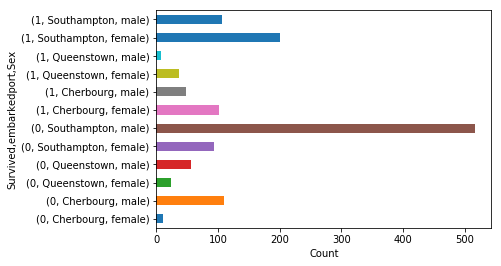

In [39]:
df1.groupby(['Survived','embarkedport','Sex']).count().Age_group.plot(kind='barh')
print("Legend:\n 0 = Did not survive \n 1 = Survived")
plt.xlabel("Count")

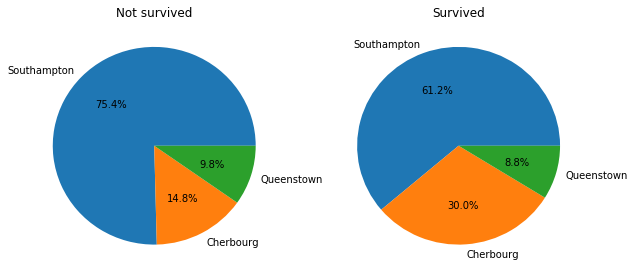

In [40]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

notsurvivors = df1[df1.Survived==0].embarkedport.value_counts()
survivors= df1[df1.Survived==1].embarkedport.value_counts()


# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index,autopct='%1.1f%%');
ax1.title.set_text('Not survived')
ax2.pie(survivors,labels=survivors.index,autopct='%1.1f%%');
ax2.title.set_text('Survived')

## PCLASS

In [41]:
df1.groupby(['economic_status']).count().Sex

economic_status
Lower     709
Middle    277
Upper     323
Name: Sex, dtype: int64

In [42]:
df1.groupby(['Survived','economic_status']).count().Age_group

Survived  economic_status
0         Lower              528
          Middle             158
          Upper              123
1         Lower              181
          Middle             119
          Upper              200
Name: Age_group, dtype: int64

# Survivors to total ratio:
- Lower = 0.26
- Middle = 0.43
- Upper = 0.62

In [43]:
df1.groupby(['economic_status','Sex']).count().Age_group

economic_status  Sex   
Lower            female    216
                 male      493
Middle           female    106
                 male      171
Upper            female    144
                 male      179
Name: Age_group, dtype: int64

In [44]:
df1.groupby(['Survived','economic_status','Sex']).count().Age_group

Survived  economic_status  Sex   
0         Lower            female    110
                           male      418
          Middle           female     12
                           male      146
          Upper            female      5
                           male      118
1         Lower            female    106
                           male       75
          Middle           female     94
                           male       25
          Upper            female    139
                           male       61
Name: Age_group, dtype: int64

In [45]:
survivedcrosstabsex = pd.crosstab(index=df1.Survived, columns = [df1['economic_status'],df1['Sex']],margins=True)
survivedcrosstabsex

economic_status  Lower      Middle       Upper        All
Sex             female male female male female male      
Survived                                                 
0                  110  418     12  146      5  118   809
1                  106   75     94   25    139   61   500
All                216  493    106  171    144  179  1309

Legend:
 0 = Did not survive 
 1 = Survived


Text(0.5,0,'Count')

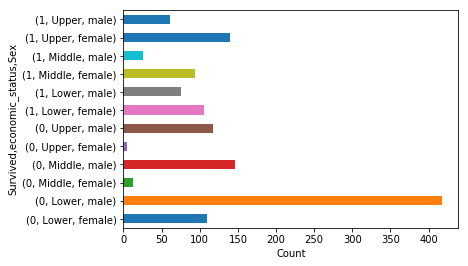

In [46]:
(df1.groupby(['Survived','economic_status','Sex']).count().Age_group).plot(kind='barh',stacked=True)
print("Legend:\n 0 = Did not survive \n 1 = Survived")
plt.xlabel("Count")

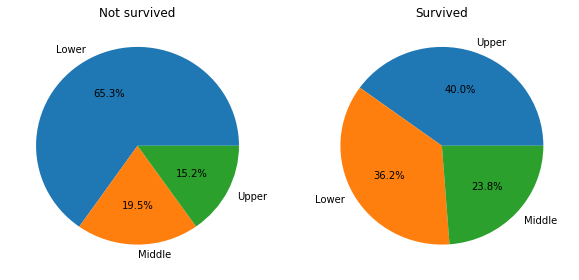

In [47]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

notsurvivors = df1[df1.Survived==0].economic_status.value_counts()
survivors= df1[df1.Survived==1].economic_status.value_counts()


# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index,autopct='%1.1f%%');
ax1.title.set_text('Not survived')
ax2.pie(survivors,labels=survivors.index,autopct='%1.1f%%');
ax2.title.set_text('Survived')

## AgeGroup
- **0-10**   Kid
- **11-19**  Teenager
- **20-26**  Young Adult
- **27-60**  Adult
- **60-85**  Sr.Citizen

In [48]:
df1.groupby(['Age_group']).count().Sex

Age_group
Kid             86
Teenager       139
Young Adult    248
Adult          803
Sr.Citizen      33
Name: Sex, dtype: int64

In [49]:
df1.groupby(['Age_group','Sex']).count().embarkedport

Age_group    Sex   
Kid          female     41
             male       45
Teenager     female     62
             male       77
Young Adult  female     84
             male      164
Adult        female    272
             male      531
Sr.Citizen   female      7
             male       26
Name: embarkedport, dtype: int64

In [50]:
df1.groupby(['Survived','Age_group']).count().Sex

Survived  Age_group  
0         Kid             36
          Teenager        83
          Young Adult    155
          Adult          510
          Sr.Citizen      25
1         Kid             50
          Teenager        56
          Young Adult     93
          Adult          293
          Sr.Citizen       8
Name: Sex, dtype: int64

# Survivors to total ratio:
- kid         = 0.58
- Teenager    = 0.40
- Young Adult = 0.37
- Adult       = 0.36
- Sr.Citizen  = 0.24

In [51]:
df1.groupby(['Survived','Age_group','Sex']).count().embarkedport

Survived  Age_group    Sex   
0         Kid          female     16
                       male       20
          Teenager     female     15
                       male       68
          Young Adult  female     23
                       male      132
          Adult        female     72
                       male      438
          Sr.Citizen   female      1
                       male       24
1         Kid          female     25
                       male       25
          Teenager     female     47
                       male        9
          Young Adult  female     61
                       male       32
          Adult        female    200
                       male       93
          Sr.Citizen   female      6
                       male        2
Name: embarkedport, dtype: int64

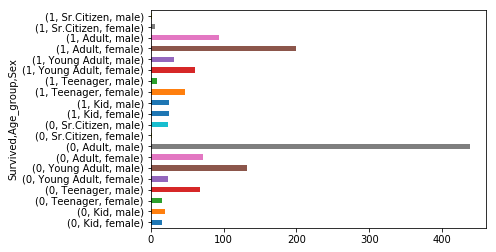

In [52]:
(df1.groupby(['Survived','Age_group','Sex']).count().embarkedport).plot(kind='barh')

In [53]:
# survivedcrosstabsex = pd.crosstab(index=df1.Survived, columns = [df1['Age_group'],df1['Sex']],margins=True)
# survivedcrosstabsex

In [54]:
df1.groupby(['Survived','Age_group','economic_status','Sex']).count().embarkedport

Survived  Age_group    economic_status  Sex   
0         Kid          Lower            female     15.0
                                        male       20.0
                       Middle           female      NaN
                                        male        NaN
                       Upper            female      1.0
                                        male        NaN
          Teenager     Lower            female     14.0
                                        male       49.0
                       Middle           female      1.0
                                        male       15.0
                       Upper            female      NaN
                                        male        4.0
          Young Adult  Lower            female     19.0
                                        male       93.0
                       Middle           female      3.0
                                        male       32.0
                       Upper            female      1.0
 

In [55]:
survivedcrosstabsex = pd.crosstab(index=df1.Survived, columns = [df1['Age_group'],df1['Sex'],df1['economic_status']],margins=True)
survivedcrosstabsex

Age_group          Kid                                 Teenager              \
Sex             female               male                female        male   
economic_status  Lower Middle Upper Lower Middle Upper    Lower Upper Lower   
Survived                                                                      
0                   14      1     0    49     15     4        0     1     5   
1                   20     12    15     5      1     3        1     5     0   
All                 34     13    15    54     16     7        1     6     5   

Age_group               ...  Adult              Sr.Citizen                     \
Sex                     ...   male                  female               male   
economic_status Middle  ...  Lower Middle Upper      Lower Middle Upper Lower   
Survived                ...                                                     
0                    5  ...     20      0     0         62      8     2   251   
1                    1  ...     11     11     3         52     50    98    37   
All                  6  ...     31     11     3        114     58   100   288   

Age_group                      All  
Sex                                 
economic_status Middle Upper        
Survived                            
0                   94    93   809  
1                    8    48   500  
All                102   141  1309  

[3 rows x 30 columns]

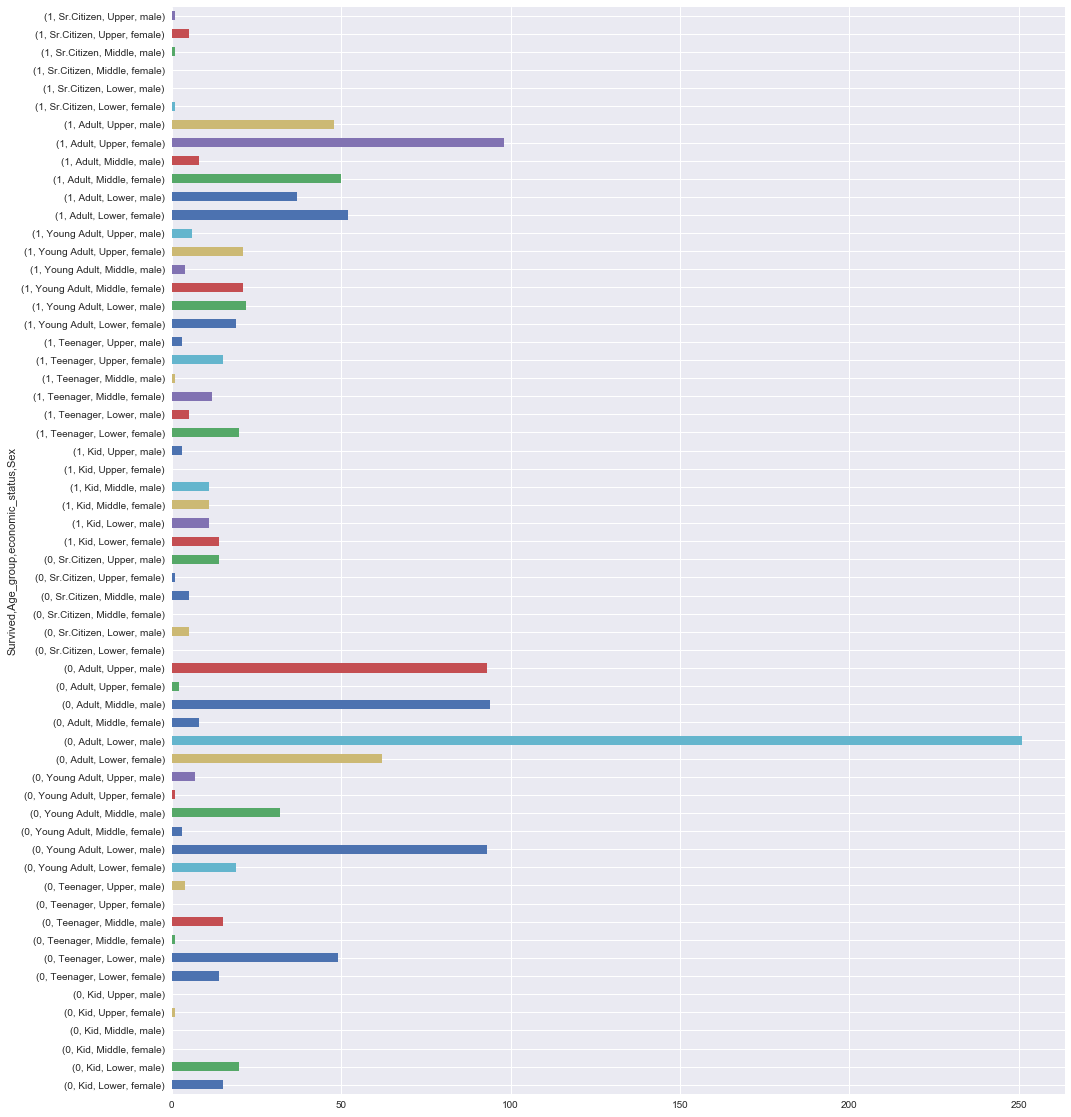

In [91]:
sns.set(rc={'figure.figsize':(16,20)})
(df1.groupby(['Survived','Age_group','economic_status','Sex']).count().embarkedport).plot(kind='barh')



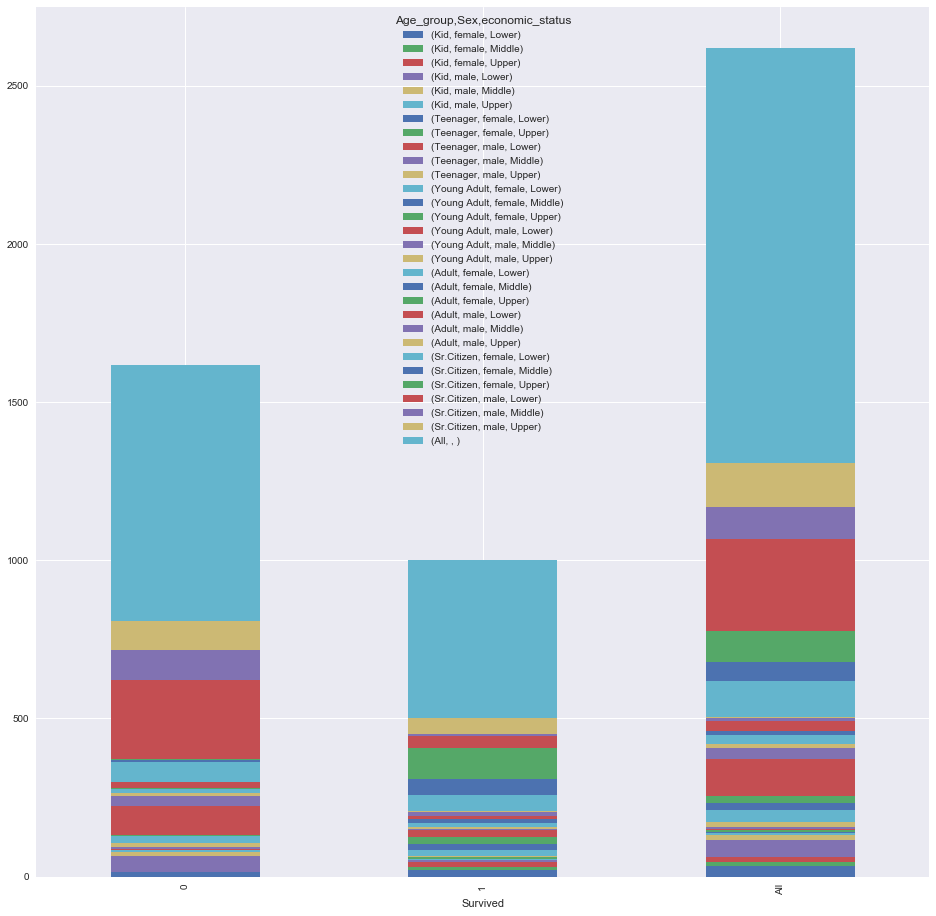

In [92]:
sns.set(rc={'figure.figsize':(16,16)})
survivedcrosstabsex.plot(kind='bar',stacked=True)


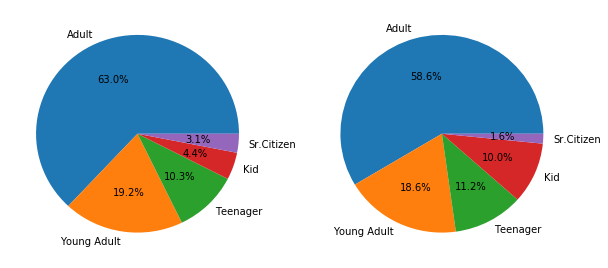

In [57]:
# create a figure with two subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

notsurvivors = df1[df1.Survived==0].Age_group.value_counts()
survivors= df1[df1.Survived==1].Age_group.value_counts()


# plot each pie chart in a separate subplot
ax1.pie(notsurvivors,labels=notsurvivors.index,autopct='%1.1f%%');
ax2.pie(survivors,labels=survivors.index,autopct='%1.1f%%');

In [58]:
def bar_chart(feature):
    Survived=df1[df1['Survived']==1][feature].value_counts()
    Not_Survived=df1[df1['Survived']==0][feature].value_counts()
    df=pd.DataFrame([Survived,Not_Survived])
    df.index=['Survived','Not_Survived']
    df.plot(kind='bar',stacked=True)

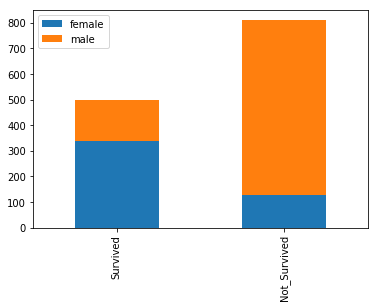

In [59]:
bar_chart('Sex')

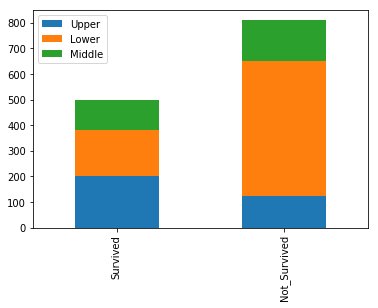

In [60]:
bar_chart('economic_status')

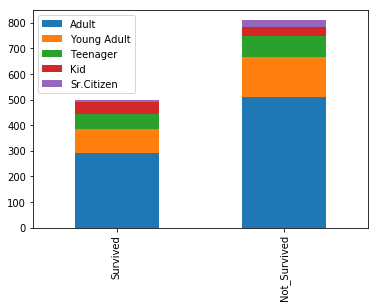

In [61]:
bar_chart('Age_group')

## Prediction 

In [62]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
X = df1.drop(['Survived'],axis=1)
Y = df1['Survived']

In [64]:
X=pd.get_dummies(X)

In [67]:
from sklearn.model_selection import train_test_split
#splitting the train and test sets
X_train, X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
print ("Total dataset - ", X.shape, Y.shape)
print ("Training dataset - ", X_train.shape, Y_train.shape)
print ("Testing dataset - ", X_test.shape, Y_test.shape)

Total dataset -  (1309, 15) (1309,)
Training dataset -  (1047, 15) (1047,)
Testing dataset -  (262, 15) (262,)


In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.32

In [69]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.38

In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.71

In [71]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.43

In [72]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.43

In [73]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.43
4,Decision Tree,84.43
1,KNN,82.71
0,Support Vector Machines,81.38
2,Logistic Regression,80.32


In [75]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model=DecisionTreeClassifier()
model = model.fit(X_train, Y_train) #training the model
y_predict = model.predict(X_test)
print('Accuracy of model :',accuracy_score(Y_test, y_predict))

Accuracy of model : 0.7709923664122137


In [76]:
# Random Forest
from sklearn.metrics import r2_score

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
X_prediction = random_forest.predict(X_train)

print('Accuracy of model test :',accuracy_score(Y_test, Y_prediction))

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Accuracy of model test : 0.7748091603053435
84.43 %


In [77]:
def Test(Predic):
    if random_forest.predict([Predic]) == 0:
        print("Would not survive")
    else:
        print("Survive")

In [78]:
input=[1,1,1,0,0,0,1,0,0,1,0,0,0,1,0]
Test(input)

Survive


In [79]:
total_predict = model.predict(X)

In [80]:
count=0
count1=0
for i in total_predict:
    if i==1:
        count+=1
    else:
        count1+=1
print(count)
print(count1)

403
906


In [ ]:
X_train.head(5)

In [ ]:
def Test(Predic):
    if model.predict([Predic]) == 0:
        print("Would not survive")
    else:
        print("Survive")

In [ ]:
input=[1,1,1,0,0,0,1,0,0,1,0,0,0,1,0]
Test(input)

In [ ]:
total_predict = model.predict(X)

In [ ]:
count=0
count1=0
for i in total_predict:
    if i==1:
        count+=1
    else:
        count1+=1
print(count)
print(count1)

## Conclusion:
- **Gender plays a very important roles, female has the most likelihood of surviving.**
- **The higher Socioeconomic status, the more likelihood of surviving (especially for female)**
- **Kid has higher chances of surviving as long as he/she does not have low socioeconomic status**

In [ ]:
plt.figure(figsize=(16,9))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True , linewidths=.5)

In [ ]:
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(df , size = 10)

In [ ]:
X_train

In [ ]:
df1.head(5)

In [ ]:
X = df1.drop(['Survived','familymembers','hasfamily','embarkedport'],axis=1)
y = df1['Survived']

In [ ]:
# Clean up x by getting the dummies
X=pd.get_dummies(X)

In [ ]:
#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)
print ("Total dataset - ", X.shape, y.shape)
print ("Training dataset - ", X_train.shape, y_train.shape)
print ("Testing dataset - ", X_test.shape, y_test.shape)

In [ ]:
X_train.head(5)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model = model.fit(X_train, y_train) #training the model
y_predict = model.predict(X_test)
print('Accuracy of model :',accuracy_score(y_test, y_predict))

In [ ]:
def Test(Predic):
    if model.predict([Predic]) == 0:
        print("Would not survive")
    else:
        print("Survive")

In [ ]:
input=[1,0,0,1,0,1,0,0,0,0]
Test(input)

In [ ]:
total_predict = model.predict(X)

In [ ]:
count=0
count1=0
for i in total_predict:
    if i==1:
        count+=1
    else:
        count1+=1
print(count)
print(count1)

In [ ]:
- Upper 24.67